### Loading data

In [1296]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
# import geopandas as gpd
import json

# Consistent theme
import plotly.io as pio
pio.templates.default = "plotly_white"

In [1297]:
filename = "../data/cbioportal/cll_broad_2022_clinical_data.csv"

df = pd.read_csv(filename)
df.head()

,patientId,sampleId,studyId,ARRAY450K,CANCER_TYPE,CANCER_TYPE_DETAILED,CENTER,CLL_EPITYPE,DISEASE_TYPE,EC_DISCOVERY,...,FFS_STATUS,IGHV_IDENTITY_PERCENTAGE,IGHV_MUTATION_STATUS,OS_MONTHS,OS_STATUS,PRIOR_TREATMENT_CATEGORY,SAMPLE_COUNT,SEX,TREATMENT_AFTER_SAMPLING,TREATMENT_STATUS
0,P-CRC-0001,CRC-0001,cll_broad_2022,No,Mature B-Cell Neoplasms,Chronic Lymphocytic Leukemia/Small Lymphocytic...,Broad,n-CLL,CLL,Yes,...,1:Failure,100.00,unmutated,147.19,1:DECEASED,Untreated,1,Female,Chemo + Ab,Pre-treatment
1,P-CRC-0002,CRC-0002,cll_broad_2022,No,Mature B-Cell Neoplasms,Chronic Lymphocytic Leukemia/Small Lymphocytic...,Broad,n-CLL,CLL,Yes,...,1:Failure,100.00,unmutated,154.49,1:DECEASED,Untreated,1,Male,Chemo + Ab,Pre-treatment
2,P-CRC-0003,CRC-0003,cll_broad_2022,No,Mature B-Cell Neoplasms,Chronic Lymphocytic Leukemia/Small Lymphocytic...,Broad,n-CLL,CLL,Yes,...,1:Failure,100.00,unmutated,51.25,1:DECEASED,Untreated,1,Female,Chemo + Ab,Pre-treatment
3,P-CRC-0004,CRC-0004,cll_broad_2022,No,Mature B-Cell Neoplasms,Chronic Lymphocytic Leukemia/Small Lymphocytic...,Broad,m-CLL,CLL,Yes,...,1:Failure,92.28,mutated,183.55,0:LIVING,Untreated,1,Male,Chemo + Ab,Pre-treatment
4,P-CRC-0005,CRC-0005,cll_broad_2022,No,Mature B-Cell Neoplasms,Chronic Lymphocytic Leukemia/Small Lymphocytic...,Broad,n-CLL,CLL,Yes,...,1:Failure,100.00,unmutated,164.35,0:LIVING,Untreated,1,Male,Chemo + Ab,Pre-treatment


In [1298]:
print(df.columns)

Index(['patientId', 'sampleId', 'studyId', 'ARRAY450K', 'CANCER_TYPE',
       'CANCER_TYPE_DETAILED', 'CENTER', 'CLL_EPITYPE', 'DISEASE_TYPE',
       'EC_DISCOVERY', 'EC_EXTENSION', 'IGLV3_21_R110', 'M-CLL_WES',
       'MUTATION_COUNT', 'NORMAL_MEAN_COVERAGE', 'ONCOTREE_CODE',
       'RNA_SEQUENCING', 'RRBS', 'SEQUENCING_PLATFORM', 'SOMATIC_STATUS',
       'TMB_NONSYNONYMOUS', 'TUMOR_MEAN_COVERAGE', 'TUMOR_MOLECULAR_SUBTYPE',
       'TUMOR_SAMPLE_PLOIDY', 'TUMOR_SAMPLE_PURITY', 'U-CLL_WES', 'U1_STATUS',
       'AGE', 'AGE_SAMPLING', 'COHORT', 'DEATH_DAYS', 'EXPRESSION_CLUSTER',
       'FFS_MONTHS', 'FFS_STATUS', 'IGHV_IDENTITY_PERCENTAGE',
       'IGHV_MUTATION_STATUS', 'OS_MONTHS', 'OS_STATUS',
       'PRIOR_TREATMENT_CATEGORY', 'SAMPLE_COUNT', 'SEX',
       'TREATMENT_AFTER_SAMPLING', 'TREATMENT_STATUS'],
      dtype='object')


### Adding Data Origin and Source Information

In [1299]:
originIdLabels = {
    1: {
        "org": "ICGC",
        "paper_reference": 2,
        "dataset_tag": "2015_1",
        "count": 506,
        "description": "CLL (n=452), MBL (n=54)",
        "origin": 'PUBLICATION',
        "year": "2015",
        "pmid": "26200345",
    },
    2: {
        "org": "UCSD",
        "paper_reference": 3,
        "count": 21,
        "duplicates": 4,
        "origin": 'PUBLICATION',
        "year": "2019",
        "pmid": "31142838",
    },
    3: {
        "org": "DFCI",
        "paper_reference": 11,
        "count": 25,
        "origin": 'PUBLICATION',
        "year": "2015",
        "pmid": "26638776",
    },
    4: {
        "org": "NHLBI",
        "paper_reference": -1,
        "count": 21,
        "duplicates": 1,
        "origin": 'PUBLICATION',
        "year": "2022",
        "pmid": "35358998",
    },
    5: {
        "org": "DFCI",
        "paper_reference": 1,
        'dataset_tag': "2015_2",
        "count": 154,
        "origin": 'PUBLICATION',
        "description": "coming from 2013 publication - DFCI_Cell_2013",
        "year": "2013",
        "pmid": "23415222",
    },
    6: {
        "org": "GCLLSG",
        "paper_reference": [1, 62],
        'dataset_tag': "2015_2",
        "count": 309,
        "origin": 'TRIAL',
        "description": "GCLLSG_CLL8 trial: comparison of fludarabine and cyclophosphamide (FC) to FC-rituximab (FCR) in previously untreated patients",
        "nctId": "NCT00281918",
        "year": "2013",
    },
    7: {
        "org": "GCLLSG",
        "paper_reference": 63,
        "count": 31,
        "origin": 'TRIAL',
        "description": "GCLLSG_CLL2O trial: treatment-naive TP53-mutated patients within phase 2 CLL20 trial who all received alemtuzumab",
        "year": "2014",
        "nctId": "CLL2O",
    },
    8: {
        "org": "NHLBI",
        "paper_reference": 10,
        "count": 51,
        "origin": 'TRIAL',
        "description": "phase 2 clinical trials of single-agent ibrutinib",
        "nctId": "NCT01500733",
        "year": "2014",
    },
    9: {
        "org": "MDACC",
        "paper_reference": [10, 12],
        "count": 25,
        "origin": 'TRIAL',
        "description": "phase 2 clinical trials of ibrutinib with rituximab ",
        "nctId": "NCT01520519",
        "year": "2019",
    }
}

In [1300]:
# drop rows where patientId is in range P-CRC-0025 to P-CRC-0035 inclusive
print("#Rows before dropping untraced rows:", len(df))
df = df[~df['patientId'].isin([f'P-CRC-{i:04d}' for i in range(25, 36)])]
print("#Rows after dropping untraced rows:", len(df))
# 6 rows were not traceable

#Rows before dropping untraced rows: 1154
#Rows after dropping untraced rows: 1148


In [1301]:
# for duplicate patient ids, keep the first occurrence
print("#Rows before dropping duplicates:", len(df))
df = df.drop_duplicates(subset='patientId', keep='first')
print("#Rows after dropping duplicates:", len(df))
# 5 rows were duplicates

#Rows before dropping duplicates: 1148
#Rows after dropping duplicates: 1143


In [1302]:
# add new column called originId and we will create a function to populate it
def create_origin_id(row):
    # if patientId starts with P-SCLL-0001, then originId = 1
    if row["patientId"].startswith("P-SCLL-"):
        return 1
    # if patientId falls in between P-CRC-0001 and P-CRC-0021, inclusive, then originId = 2
    elif row["patientId"].startswith("P-CRC-") and int(row["patientId"][6:]) in range(1, 22):
        return 2
    # if patientId starts with P-JB-, then originId = 3
    elif row["patientId"].startswith("P-JB-"):
        return 3
    # if partientId falls in between P-NHLBI-0056 to P-NHLBI-0096, inclusive, then originId = 4
    elif row["patientId"].startswith("P-NHLBI-") and int(row["patientId"][9:]) in range(56, 97):
        return 4
    # if patientId starts with P-DFCI- then originId = 5
    elif row["patientId"].startswith("P-DFCI-"):
        return 5
    # if patientId falls in between P-GCLL-0001 to P-GCLL-0314, inclusive, then originId = 6
    elif row["patientId"].startswith("P-GCLL-") and int(row["patientId"][8:]) in range(1, 315):
        return 6
    # if patientId falls in between P-GCLL-0315 to P-GCLL-0345, inclusive, then originId = 7
    elif row["patientId"].startswith("P-GCLL-") and int(row["patientId"][8:]) in range(315, 346):
        return 7
    # if patientId falls in between P-NHLBI-0001 to P-NHLBI-0053, inclusive, then originId = 8
    elif row["patientId"].startswith("P-NHLBI-") and int(row["patientId"][9:]) in range(1, 54):
        return 8
    # if patientId falls in between P-MDAC-0001 to P-MDAC-0026, inclusive, then originId = 9
    elif row["patientId"].startswith("P-MDAC-") and int(row["patientId"][8:]) in range(1, 27):
        return 9
    else:
        return None 
        

In [1303]:
# apply the function to create the new column
df["originId"] = df.apply(create_origin_id, axis=1)

# Confirm that value counts are as expected from the originIdLabels
for originId, label in originIdLabels.items():
    expected_count = label["count"]
    actual_count = df["originId"].value_counts().get(originId, 0)
    assert actual_count == expected_count, f"Expected {expected_count} for originId {originId}, but got {actual_count}"
print("All originId counts are as expected.")

All originId counts are as expected.


In [1304]:
# add columns for year and originType and populate them
df["year"] = df["originId"].apply(lambda x: originIdLabels[x]["year"] if x in originIdLabels else None)
df["originType"] = df["originId"].apply(lambda x: originIdLabels[x]["origin"] if x in originIdLabels else None)


display(df['year'].value_counts().sort_index())
display(df['originType'].value_counts().sort_index())
print("Columns 'year' and 'originType' added successfully.")

year
2013    463
2014     82
2015    531
2019     46
2022     21
Name: count, dtype: int64

originType
PUBLICATION    727
TRIAL          416
Name: count, dtype: int64

Columns 'year' and 'originType' added successfully.


In [1305]:
df['org'] = df["originId"].apply(lambda x: originIdLabels[x]["org"] if x in originIdLabels else None)

for index, row in df.iterrows():
    if pd.notnull(row['COHORT']):
        assert row['org'] == row['COHORT'], f"Mismatch at index {index}: org={row['org']}, COHORT={row['COHORT']}"
print("All org values match COHORT values where COHORT is not null.")

# if cohort is null, populate it with the org value
print(df['COHORT'].isnull().sum(), "rows have null COHORT values before filling.")
df['COHORT'] = df.apply(lambda row: row['org'] if pd.isnull(row['COHORT']) else row['COHORT'], axis=1)
print(df['COHORT'].isnull().sum(), "rows have null COHORT values after filling.")

# drop the org column
df.drop(columns=['org'], inplace=True)

All org values match COHORT values where COHORT is not null.
0 rows have null COHORT values before filling.
0 rows have null COHORT values after filling.


In [1306]:
# for rows with trial, populate nctId
def get_nct_id(row):
    if row['originId'] in originIdLabels:
        return originIdLabels[row['originId']].get('nctId', None)
    return None

df['nctId'] = df.apply(get_nct_id, axis=1)
df['nctId'].value_counts().sort_index().to_frame().head(10)

,count
nctId,
CLL2O,31
NCT00281918,309
NCT01500733,51
NCT01520519,25


### Cleaning columns

In [1307]:
column_definitions = {
    "patientId": "Unique patient identifier",
    "sampleId": "Unique sample identifier",
    'AGE': "Age at diagnosis in years",
    'AGE_SAMPLING': "Age at sampling in years",
    "SEX": "Male/Female",
    'COHORT': "Cohort: ICGC, DFCI, GCLLSG, NHLBI, UCSD, MDACC",
    'DEATH_DAYS': "Death (days) from the date of sampling",
    'FFS_MONTHS': "Failure free survival (months)",
    'FFS_STATUS': "Failure free status - 1:Failure, 0:FailureFree",
    "OS_MONTHS": "Overall survival (months) from the date of the sequenced sample",
    "OS_STATUS": "Overall survival status - 0:LIVING, 1:DECEASED",
    "PRIOR_TREATMENT_CATEGORY": "Prior treatment category: CheUntreatedmo, Chemo + Ab, Chemo + no Ab, etc.",
    "TREATMENT_STATUS": "Treatment status at sampling: Pre-treatment, Post-treatment",
    'TREATMENT_AFTER_SAMPLING': "Treatment after sampling: Chemo + Ab, Chemo + no Ab, etc.",

    "CLL_EPITYPE": "CLL epitype classification: n-CLL, m-CLL, i-CLL, unclassified",
    'DISEASE_TYPE': "Disease type: CLL, MBL",
    'MUTATION_COUNT': "Number of mutations in the sample",
    'U1_STATUS': "U1 mutation status can be either wild-type (WT) or mutant (MUT), depending on whether a specific mutation, often the g.3A>C mutation, is present in the U1 spliceosomal RNA",

    # "IGLV3_21_R110"
    # "TMB_NONSYNONYMOUS"
    # "TUMOR_MOLECULAR_SUBTYPE"
    # "IGHV_MUTATION_STATUS": "IGHV mutational status (mutated / unmutated, cutoff set at 98% identity to reference)"
    # "IGHV_IDENTITY_PERCENTAGE": "IGHV identity to reference"
    # "EXPRESSION_CLUSTER"
    # "SAMPLE_COUNT" # 2 for 12 entries, rest is 1

    "SOMATIC_STATUS": " Identifying mutations (variants) within a tumor sample that are not present in a matched normal (or non-cancerous) sample from the same individual",

    # Within whole-exome sequencing (WES) or whole-genome sequencing (WGS) data, the following columns are defined:
    # the below two are metrics to show how much depth the sequencing has been done and confidence in the data
    'NORMAL_MEAN_COVERAGE': "Mean read coverage of Normal sample",
    'TUMOR_MEAN_COVERAGE': "Mean read coverage of Tumor sample",
    "TUMOR_SAMPLE_PURITY": "Tumor sample purity (based on ABSOLUTE)",
    "TUMOR_SAMPLE_PLOIDY": "Tumor sample ploidy (based on ABSOLUTE)",

    'SEQUENCING_PLATFORM': "Sequencing platform used for the sample: WES, WGS or WES/WGS",
    "ARRAY450K": "If included in the 450K array methylation analysis: Yes or No",
    'RNA_SEQUENCING': "If included in RNA sequencing analysis: Yes or No",
    'RRBS': "If included in reduced representation bisulfite sequencing (RRBS) analysis: Yes or No",

    "EC_DISCOVERY": "If included in expression cluster discovery set: Yes or No",
    "EC_EXTENSION": "If included in expression cluster extension set: Yes or No",
    'M-CLL_WES': "If included in M-CLL WES genetic candidate driver discovery cohort: Yes or No",
    'U-CLL_WES': "If included in U-CLL WES genetic candidate driver discovery cohort: Yes or No",

}


In [1308]:
cols_to_drop = [
    'studyId', 'CANCER_TYPE', 'CANCER_TYPE_DETAILED', 'CENTER', 'ONCOTREE_CODE', "SOMATIC_STATUS",
    'ARRAY450K', 'EC_DISCOVERY', 'EC_EXTENSION', 'M-CLL_WES', 'U-CLL_WES', 'RNA_SEQUENCING', 'RRBS', 'SAMPLE_COUNT',
    'NORMAL_MEAN_COVERAGE', 'TUMOR_MEAN_COVERAGE', 'SEQUENCING_PLATFORM', "TUMOR_SAMPLE_PURITY", "TUMOR_SAMPLE_PLOIDY",
]

# drop the columns that are not needed
df = df.drop(columns=cols_to_drop)
print(df.columns)

Index(['patientId', 'sampleId', 'CLL_EPITYPE', 'DISEASE_TYPE', 'IGLV3_21_R110',
       'MUTATION_COUNT', 'TMB_NONSYNONYMOUS', 'TUMOR_MOLECULAR_SUBTYPE',
       'U1_STATUS', 'AGE', 'AGE_SAMPLING', 'COHORT', 'DEATH_DAYS',
       'EXPRESSION_CLUSTER', 'FFS_MONTHS', 'FFS_STATUS',
       'IGHV_IDENTITY_PERCENTAGE', 'IGHV_MUTATION_STATUS', 'OS_MONTHS',
       'OS_STATUS', 'PRIOR_TREATMENT_CATEGORY', 'SEX',
       'TREATMENT_AFTER_SAMPLING', 'TREATMENT_STATUS', 'originId', 'year',
       'originType', 'nctId'],
      dtype='object')


In [1309]:
# if CLL_EPITYPE is Chemo + no Ab or 0, change it to 'unclassified'
df['CLL_EPITYPE'] = df['CLL_EPITYPE'].replace({'Chemo + no Ab': 'unclassified', '0': 'unclassified'})
df['CLL_EPITYPE'] = df['CLL_EPITYPE'].fillna('unclassified')
df['CLL_EPITYPE'].value_counts()

CLL_EPITYPE
n-CLL           391
m-CLL           342
unclassified    269
i-CLL           141
Name: count, dtype: int64

### Statistical Tests

#### Age and age sampling VS cohort

In [1310]:
# Perform Kruskal-Wallis H-test to compare age across cohorts

cohorts = df['COHORT'].unique()
# cohorts = [c for c in cohorts if c != 'ICGC']
age_data = [df.loc[df['COHORT'] == cohort, 'AGE'].dropna() for cohort in cohorts]
h_stat, p_value = stats.kruskal(*age_data)


print("Kruskal-Wallis H-statistic:", h_stat)
print("p-value:", p_value)

# Interpret the results:
# - If p-value < 0.05, reject the null hypothesis that all cohorts have equal median ages.
# - The smaller the p-value, the stronger evidence against the null hypothesis.

if p_value < 0.05:
    print("Reject the null hypothesis that all cohorts have equal median ages. There is a statistically significant difference in age across cohorts.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in age across cohorts.")

# Plot box plots of age by cohort using Plotly
fig = go.Figure(data=[go.Box(y=df.loc[df['COHORT'] == c, 'AGE'],
                              name=c)
                      for c in df['COHORT'].unique()])


fig.show()


Kruskal-Wallis H-statistic: 73.48873523281439
p-value: 1.9225571954868724e-14
Reject the null hypothesis that all cohorts have equal median ages. There is a statistically significant difference in age across cohorts.


In [1311]:
cohorts = df['COHORT'].unique()
age_data = [df.loc[df['COHORT'] == cohort, 'AGE_SAMPLING'].dropna() for cohort in cohorts]
h_stat, p_value = stats.kruskal(*age_data)


print("Kruskal-Wallis H-statistic:", h_stat)
print("p-value:", p_value)

# Interpret the results:
# - If p-value < 0.05, reject the null hypothesis that all cohorts have equal median ages.
# - The smaller the p-value, the stronger evidence against the null hypothesis.

if p_value < 0.05:
    print("Reject the null hypothesis that all cohorts have equal median ages. There is a statistically significant difference in age across cohorts.")
else:
    print("Fail to reject the null hypothesis. There is no statistically significant difference in age across cohorts.")

# Plot box plots of age by cohort using Plotly
fig = go.Figure(data=[go.Box(y=df.loc[df['COHORT'] == c, 'AGE_SAMPLING'],
                              name=c)
                      for c in df['COHORT'].unique()])

fig.show()

Kruskal-Wallis H-statistic: 96.24057426969881
p-value: 3.273007688287831e-19
Reject the null hypothesis that all cohorts have equal median ages. There is a statistically significant difference in age across cohorts.


In [1312]:
# Do the same test for time from diagnosis to sampling ,ie. AGE_SAMPLING - AGE if both are not null

age_df = df.copy(deep=True)
age_df['TIME_FROM_DIAGNOSIS_TO_SAMPLING'] = age_df['AGE_SAMPLING'] - age_df['AGE']
age_df = age_df.dropna(subset=['TIME_FROM_DIAGNOSIS_TO_SAMPLING'])


cohorts = age_df['COHORT'].unique()
avg_time = age_df.groupby('COHORT')['TIME_FROM_DIAGNOSIS_TO_SAMPLING'].mean().sort_values()
print("Average time from diagnosis to sampling (years):")
print(avg_time)

# Plot the average time from diagnosis to sampling for each cohort
fig = px.bar(avg_time, x=avg_time.index, y=avg_time.values,
             labels={'x': 'Cohort', 'y': 'Average Time from Diagnosis to Sampling (years)'},
             title='Average Time from Diagnosis to Sampling by Cohort')
fig.update_layout(xaxis_title='Cohort', yaxis_title='Average Time from Diagnosis to Sampling (years)')

fig.show()

Average time from diagnosis to sampling (years):
COHORT
UCSD      2.238095
GCLLSG    2.534296
NHLBI     4.250000
ICGC      4.487696
MDACC     7.045455
DFCI      8.543860
Name: TIME_FROM_DIAGNOSIS_TO_SAMPLING, dtype: float64


#### Age and age sampling VS origin type

In [1313]:
# Perform Mann-Whitney U-test to compare age between TRIAL and PUBLICATION originTypes
u_stat, p_value = stats.mannwhitneyu(df.loc[df['originType'] == 'TRIAL', 'AGE'],
                                     df.loc[df['originType'] == 'PUBLICATION', 'AGE'])

print("Mann-Whitney U-statistic:", u_stat)
print("p-value:", p_value)

# Interpret the results:
# - If p-value < 0.05, reject the null hypothesis that TRIAL and PUBLICATION originTypes have equal medians.
# - The smaller the p-value, the stronger evidence against the null hypothesis.

if p_value < 0.05:
    print("Reject the null hypothesis: There is a statistically significant difference in age between TRIAL and PUBLICATION originTypes.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in age between TRIAL and PUBLICATION originTypes.")

# Plot violin plot of originType by age using Plotly
fig = go.Figure(data=[go.Violin(y=df.loc[df['originType'] == c, 'AGE'],
                                 name=c,
                                 box_visible=True)
                      for c in df['originType'].unique()])

# Display the plot
fig.show()


Mann-Whitney U-statistic: nan
p-value: nan
Fail to reject the null hypothesis: There is no statistically significant difference in age between TRIAL and PUBLICATION originTypes.


In [1314]:
# Perform Mann-Whitney U-test to compare age between TRIAL and PUBLICATION originTypes
u_stat, p_value = stats.mannwhitneyu(df.loc[df['originType'] == 'TRIAL', 'AGE_SAMPLING'],
                                     df.loc[df['originType'] == 'PUBLICATION', 'AGE_SAMPLING'])

print("Mann-Whitney U-statistic:", u_stat)
print("p-value:", p_value)

# Interpret the results:
# - If p-value < 0.05, reject the null hypothesis that TRIAL and PUBLICATION originTypes have equal medians.
# - The smaller the p-value, the stronger evidence against the null hypothesis.

if p_value < 0.05:
    print("Reject the null hypothesis: There is a statistically significant difference in age between TRIAL and PUBLICATION originTypes.")
else:
    print("Fail to reject the null hypothesis: There is no statistically significant difference in age between TRIAL and PUBLICATION originTypes.")

# Plot violin plot of originType by age using Plotly
fig = go.Figure(data=[go.Violin(y=df.loc[df['originType'] == c, 'AGE_SAMPLING'],
                                 name=c,
                                 box_visible=True)
                      for c in df['originType'].unique()])

# Display the plot
fig.show()

Mann-Whitney U-statistic: nan
p-value: nan
Fail to reject the null hypothesis: There is no statistically significant difference in age between TRIAL and PUBLICATION originTypes.


In [1315]:
# Compare avg time from diagnosis to sampling between TRIAL and PUBLICATION originTypes using plot

age_df = df.copy(deep=True)
age_df['TIME_FROM_DIAGNOSIS_TO_SAMPLING'] = age_df['AGE_SAMPLING'] - age_df['AGE']
age_df = age_df.dropna(subset=['TIME_FROM_DIAGNOSIS_TO_SAMPLING'])

# Calculate average time from diagnosis to sampling for each originType
avg_time = age_df.groupby('originType')['TIME_FROM_DIAGNOSIS_TO_SAMPLING'].mean().sort_values()
print("Average time from diagnosis to sampling (years):")
print(avg_time)

# Plot the average time from diagnosis to sampling for each originType  
fig = px.bar(avg_time, x=avg_time.index, y=avg_time.values,
             labels={'x': 'Origin Type', 'y': 'Average Time from Diagnosis to Sampling (years)'},
             title='Average Time from Diagnosis to Sampling by Origin Type')
fig.update_layout(xaxis_title='Origin Type', yaxis_title='Average Time from Diagnosis to Sampling (years)')
fig.show()

Average time from diagnosis to sampling (years):
originType
TRIAL          2.866221
PUBLICATION    5.461305
Name: TIME_FROM_DIAGNOSIS_TO_SAMPLING, dtype: float64


#### Age and age sampling VS year

In [1316]:
df[df['year'] == '2014'].shape

(82, 28)

In [1317]:
age_df = df[df['year'] != '2014']
mean_age_per_year = age_df.groupby('year')['AGE'].mean().reset_index()

# Plot line plot of mean age per year with error bars using Plotly
fig = go.Figure(data=[go.Scatter(
    x=mean_age_per_year['year'],
    y=mean_age_per_year['AGE'],
    mode='lines+markers',
)])

# Display the plot
fig.show()

In [1318]:
mean_age_per_year = df.groupby('year')['AGE_SAMPLING'].mean().reset_index()

# Plot line plot of mean age per year with error bars using Plotly
fig = go.Figure(data=[go.Scatter(
    x=mean_age_per_year['year'],
    y=mean_age_per_year['AGE_SAMPLING'],
    # error_y=dict(type='data', array=mean_age_per_year['AGE'].std() / np.sqrt(len(df.groupby('year')['AGE'])),
    #              visible=True),
    mode='lines+markers',
)])

# Display the plot
fig.show()

In [1319]:
# AVG TIME FROM DIAGNOSIS TO SAMPLING
age_df = df[df['year'] != '2014']
age_df['TIME_FROM_DIAGNOSIS_TO_SAMPLING'] = age_df['AGE_SAMPLING'] - age_df['AGE']
age_df = age_df.dropna(subset=['TIME_FROM_DIAGNOSIS_TO_SAMPLING'])
avg_time = age_df.groupby('year')['TIME_FROM_DIAGNOSIS_TO_SAMPLING'].mean().reset_index()
# Plot line plot of average time from diagnosis to sampling per year with error bars using Plotly
fig = go.Figure(data=[go.Scatter(
    x=avg_time['year'],
    y=avg_time['TIME_FROM_DIAGNOSIS_TO_SAMPLING'],
    mode='lines+markers',
)])
# Display the plot
fig.show()

/var/folders/_x/_k57kbwj3f11_drmx91npc7w0000gn/T/ipykernel_11264/3443592994.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



#### Sex VS cohort

In [1320]:
# Calculate the frequency of sex per cohort using groupby and value_counts
sex_per_cohort = df.groupby(['COHORT', 'SEX']).size().unstack('SEX').fillna(0)

# Perform Chi-squared test for independence across multiple groups
chi2_stat, p_value, dof, expected = stats.chi2_contingency(sex_per_cohort.fillna(0).values)

print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)

# Interpret the results:
# - If p-value < 0.05, reject the null hypothesis that sex is independent of cohort.
# - The smaller the p-value, the stronger evidence against the null hypothesis.

if p_value < 0.05:
    print("Reject the null hypothesis: Sex is not independent of cohort.")
else:
    print("Fail to reject the null hypothesis: Sex is independent of cohort.")

print("Expected frequencies:")
for i in range(sex_per_cohort.shape[1]):
    for j in range(sex_per_cohort.shape[0]):
        print(f"{sex_per_cohort.columns[i]} {sex_per_cohort.index[j]}:\t{expected[j, i]:.2f}")


# Calculate percentages for annotation
sex_pct = sex_per_cohort.div(sex_per_cohort.sum(axis=1), axis=0) * 100

# Plot grouped bar chart of cohort by sex with annotated percentages using Plotly
fig = go.Figure(data=[
    go.Bar(
        x=sex_per_cohort.index,
        y=sex_per_cohort['Male'],
        name='Male',
        marker_color='steelblue',
        offsetgroup=0
    ),
    go.Bar(
        x=sex_per_cohort.index,
        y=sex_per_cohort['Female'],
        name='Female',
        marker_color='salmon',
        offsetgroup=1
    )
])

# Add percentage annotations in the middle of each bar
for i, cohort in enumerate(sex_per_cohort.index):
    male_height = sex_per_cohort.loc[cohort, 'Male']
    female_height = sex_per_cohort.loc[cohort, 'Female']
    if male_height > 0:
        fig.add_annotation(
            x=cohort,
            y=male_height/2,
            text=f"{sex_pct.loc[cohort, 'Male']:.1f}%",
            showarrow=False,
            font=dict(color="white"),
            xanchor='center'
        )
    if female_height > 0:
        fig.add_annotation(
            x=cohort,
            y=female_height/2,
            text=f"{sex_pct.loc[cohort, 'Female']:.1f}%",
            showarrow=False,
            font=dict(color="black"),
            xanchor='center',
            yshift=male_height  # shift annotation above the male bar
        )

fig.update_layout(
    barmode='group',
    title='Sex Distribution by Cohort',
    yaxis_title='Count',
    xaxis_title='Cohort'
)
fig.show()


Chi-squared statistic: 25.87562952338918
p-value: 9.433087993697898e-05
Reject the null hypothesis: Sex is not independent of cohort.
Expected frequencies:
Female DFCI:	63.71
Female GCLLSG:	120.97
Female ICGC:	181.09
Female MDACC:	8.95
Female NHLBI:	25.77
Female UCSD:	7.52
Male DFCI:	114.29
Male GCLLSG:	217.03
Male ICGC:	324.91
Male MDACC:	16.05
Male NHLBI:	46.23
Male UCSD:	13.48


#### Sex VS originType

In [1321]:
# Calculate contingency table of origin type by sex using crosstab
contingency_table = pd.crosstab(df['originType'], df['SEX'])

# Calculate percentages for annotations
total_pub = contingency_table.loc['PUBLICATION'].sum()
total_trial = contingency_table.loc['TRIAL'].sum()
pct_male_pub = 100 * contingency_table.loc['PUBLICATION', 'Male'] / total_pub
pct_female_pub = 100 * contingency_table.loc['PUBLICATION', 'Female'] / total_pub
pct_male_trial = 100 * contingency_table.loc['TRIAL', 'Male'] / total_trial
pct_female_trial = 100 * contingency_table.loc['TRIAL', 'Female'] / total_trial

# Perform Fisher's Exact Test to check association between origin type and sex
p_value = stats.fisher_exact(contingency_table, alternative='two-sided')
print("Fisher's Exact Test p-value:", p_value[1])

if p_value[1] < 0.05:
    print("Reject the null hypothesis: Origin type is not independent of sex.")
else:
    print("Fail to reject the null hypothesis: Origin type is independent of sex.")

# Plot stacked bar chart of origin type by sex using Plotly
fig = go.Figure(data=[
    go.Bar(
        x=contingency_table.index,
        y=contingency_table['Male'],
        name='Male',
    ),
    go.Bar(
        x=contingency_table.index,
        y=contingency_table['Female'],
        name='Female',
    ),
])

# Add annotations
fig.add_annotation(
    x='PUBLICATION', y=contingency_table.loc['PUBLICATION', 'Male']/2,
    text=f"{pct_male_pub:.1f}%", showarrow=False, yshift=10, font=dict(color="black")
)
fig.add_annotation(
    x='TRIAL', y=contingency_table.loc['TRIAL', 'Male']/2,
    text=f"{pct_male_trial:.1f}%", showarrow=False, yshift=10, font=dict(color="black")
)
fig.add_annotation(
    x='PUBLICATION', y=contingency_table.loc['PUBLICATION', 'Male'] + contingency_table.loc['PUBLICATION', 'Female']/2,
    text=f"{pct_female_pub:.1f}%", showarrow=False, yshift=10, font=dict(color="black")
)
fig.add_annotation(
    x='TRIAL', y=contingency_table.loc['TRIAL', 'Male'] + contingency_table.loc['TRIAL', 'Female']/2,
    text=f"{pct_female_trial:.1f}%", showarrow=False, yshift=10, font=dict(color="black")
)

fig.update_layout(barmode='stack', title='Sex Distribution by Origin Type')
fig.show()


Fisher's Exact Test p-value: 6.576454172295805e-06
Reject the null hypothesis: Origin type is not independent of sex.


#### Sex VS year

In [1322]:
# Chi-squared test: Sex ratio over years
sex_year_table = pd.crosstab(df['year'], df['SEX'])
chi2_stat, p_value, dof, expected = stats.chi2_contingency(sex_year_table)

print("Chi-squared statistic:", chi2_stat)
print("p-value:", p_value)
print("Degrees of freedom:", dof)

if p_value < 0.05:
    print("Reject the null hypothesis: Sex ratio is not independent of year.")
else:
    print("Fail to reject the null hypothesis: Sex ratio is independent of year.")

# Line plot: % male patients over time
male_percentage_per_year = (sex_year_table['Male'] / sex_year_table.sum(axis=1) * 100).reset_index()
male_percentage_per_year.columns = ['year', 'Male_Percentage']

fig = px.line(male_percentage_per_year, x='year', y='Male_Percentage',
              title='% Male Patients Over Time',
              markers=True,
              labels={'Male_Percentage': '% Male Patients', 'year': 'Year'})
fig.show()

Chi-squared statistic: 17.745614676439093
p-value: 0.001383660031714198
Degrees of freedom: 4
Reject the null hypothesis: Sex ratio is not independent of year.


#### CLL_EPITYPE VS cohort

Chi-squared statistic: 185.36106993692655
p-value: 1.967235179266985e-31
Degrees of freedom: 15
Reject the null hypothesis: CLL_EPITYPE distribution is not independent of COHORT.


<Figure size 1400x600 with 0 Axes>

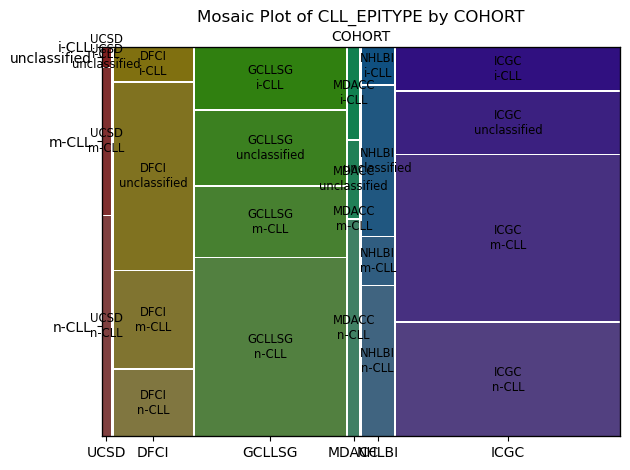

In [1323]:
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

# Prepare contingency table for CLL_EPITYPE vs COHORT
epitype_cohort_table = pd.crosstab(df['COHORT'], df['CLL_EPITYPE'])

# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(epitype_cohort_table)

print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

if p < 0.05:
    print("Reject the null hypothesis: CLL_EPITYPE distribution is not independent of COHORT.")
else:
    print("Fail to reject the null hypothesis: CLL_EPITYPE distribution is independent of COHORT.")

# Mosaic plot with better scaling and simpler labels
plt.figure(figsize=(14, 6))
mosaic(df, ['COHORT', 'CLL_EPITYPE'],
    #    labelizer=lambda k: k[1],  # Only show CLL_EPITYPE as label
       title='')
plt.title('Mosaic Plot of CLL_EPITYPE by COHORT')
plt.xlabel('COHORT')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

In [1324]:
# make stacked bar chart of CLL_EPITYPE by COHORT using Plotly with percentages
cll_epitype_cohort = df.groupby(['COHORT', 'CLL_EPITYPE']).size().unstack(fill_value=0)
cll_epitype_cohort_pct = cll_epitype_cohort.div(cll_epitype_cohort.sum(axis=1), axis=0) * 100
fig = go.Figure(data=[
    go.Bar(
        x=cll_epitype_cohort_pct.index,
        y=cll_epitype_cohort_pct[col],
        name=col
    ) for col in cll_epitype_cohort_pct.columns
])
fig.update_layout(
    barmode='stack',
    title='CLL_EPITYPE Distribution by COHORT',
    xaxis_title='Cohort',
    yaxis_title='Percentage (%)'
)
fig.show()

#### CLL_Eptitype VS originType

In [1325]:
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency

# Fisher's Exact Test for CLL_EPITYPE vs originType
# Prepare contingency table
cll_epitype_origin_table = pd.crosstab(df['originType'], df['CLL_EPITYPE'])

# Fisher's Exact Test only works for 2x2 tables, so we use Chi-squared if more than 2 categories
if cll_epitype_origin_table.shape == (2, 2):
    _, p_value = fisher_exact(cll_epitype_origin_table)
    test_name = "Fisher's Exact Test"
else:
    _, p_value, _, _ = chi2_contingency(cll_epitype_origin_table)
    test_name = "Chi-squared Test"

print(f"{test_name} p-value:", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis: CLL_EPITYPE distribution is not independent of originType.")
else:
    print("Fail to reject the null hypothesis: CLL_EPITYPE distribution is independent of originType.")

# Stacked bar plot with counts and percentage annotations
cll_epitype_origin_counts = cll_epitype_origin_table
cll_epitype_origin_pct = cll_epitype_origin_counts.div(cll_epitype_origin_counts.sum(axis=1), axis=0) * 100

fig = go.Figure()
for epitype in cll_epitype_origin_counts.columns:
    fig.add_bar(
        x=cll_epitype_origin_counts.index,
        y=cll_epitype_origin_counts[epitype],
        name=epitype
    )

# Add percentage annotations
for i, origin in enumerate(cll_epitype_origin_counts.index):
    y_offset = 0
    for epitype in cll_epitype_origin_counts.columns:
        count = cll_epitype_origin_counts.loc[origin, epitype]
        pct = cll_epitype_origin_pct.loc[origin, epitype]
        if count > 0:
            fig.add_annotation(
                x=origin,
                y=y_offset + count / 2,
                text=f"{pct:.1f}%",
                showarrow=False,
                font=dict(color="black", size=10),
                xanchor='center'
            )
        y_offset += count

fig.update_layout(
    barmode='stack',
    title='CLL_EPITYPE Distribution by Origin Type',
    xaxis_title='Origin Type',
    yaxis_title='Count'
)
fig.show()

Chi-squared Test p-value: 1.2273651209426517e-18
Reject the null hypothesis: CLL_EPITYPE distribution is not independent of originType.


#### CLL_Epitype vs Year

In [1326]:
# CLL_EPITYPE vs year: Chi-squared test and temporal distribution

# Prepare contingency table
epitype_year_table = df.groupby(['year', 'CLL_EPITYPE']).size().unstack(fill_value=0)

# Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(epitype_year_table)
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
if p < 0.05:
    print("Reject the null hypothesis: CLL_EPITYPE distribution is not independent of year.")
else:
    print("Fail to reject the null hypothesis: CLL_EPITYPE distribution is independent of year.")

# Calculate percentages for stacked area chart
epitype_year_pct = epitype_year_table.div(epitype_year_table.sum(axis=1), axis=0) * 100

# Stacked area chart (percentages) using Plotly
fig = go.Figure()
for epitype in epitype_year_pct.columns:
    fig.add_trace(go.Scatter(
        x=epitype_year_pct.index,
        y=epitype_year_pct[epitype],
        mode='lines',
        stackgroup='one',
        name=epitype
    ))
fig.update_layout(
    title='Temporal Distribution of CLL Epitypes (Stacked Area %)',
    xaxis_title='Year',
    yaxis_title='Percentage (%)',
    legend_title='CLL Epitype'
)
fig.show()

Chi-squared statistic: 157.3864783396981
p-value: 1.78890600126592e-27
Degrees of freedom: 12
Reject the null hypothesis: CLL_EPITYPE distribution is not independent of year.


#### TUMOR_MOLECULAR_SUBTYPE VS cohort

Chi-squared statistic: 65.38532583835052
p-value: 9.32321693870674e-13
Degrees of freedom: 5
Reject the null hypothesis: TUMOR_MOLECULAR_SUBTYPE distribution is not independent of COHORT.


<Figure size 1400x600 with 0 Axes>

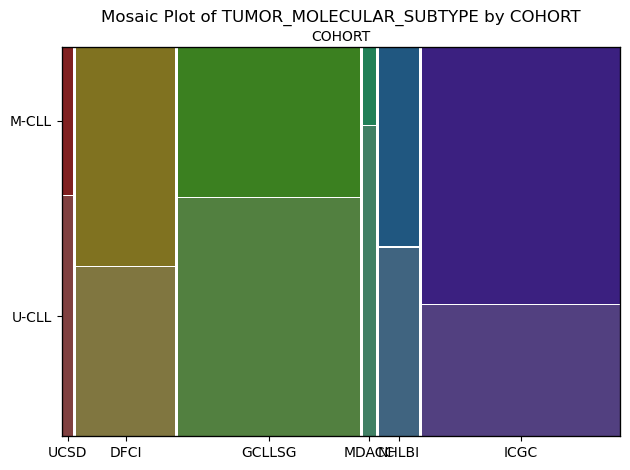

In [1327]:
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

# Prepare contingency table for TUMOR_MOLECULAR_SUBTYPE vs COHORT
epitype_cohort_table = pd.crosstab(df['COHORT'], df['TUMOR_MOLECULAR_SUBTYPE'])

# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(epitype_cohort_table)

print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

if p < 0.05:
    print("Reject the null hypothesis: TUMOR_MOLECULAR_SUBTYPE distribution is not independent of COHORT.")
else:
    print("Fail to reject the null hypothesis: TUMOR_MOLECULAR_SUBTYPE distribution is independent of COHORT.")

# Mosaic plot with better scaling and simpler labels
plt.figure(figsize=(14, 6))
mosaic(df, ['COHORT', 'TUMOR_MOLECULAR_SUBTYPE'],
       labelizer=lambda k: "" ,#k[1],  # Only show TUMOR_MOLECULAR_SUBTYPE as label
       title='')
plt.title('Mosaic Plot of TUMOR_MOLECULAR_SUBTYPE by COHORT')
plt.xlabel('COHORT')
plt.ylabel('Proportion')
plt.tight_layout()

plt.show()

In [1328]:
# make stacked bar chart of TUMOR_MOLECULAR_SUBTYPE by COHORT using Plotly with percentages
cll_epitype_cohort = df.groupby(['COHORT', 'TUMOR_MOLECULAR_SUBTYPE']).size().unstack(fill_value=0)
cll_epitype_cohort_pct = cll_epitype_cohort.div(cll_epitype_cohort.sum(axis=1), axis=0) * 100
fig = go.Figure(data=[
    go.Bar(
        x=cll_epitype_cohort_pct.index,
        y=cll_epitype_cohort_pct[col],
        name=col
    ) for col in cll_epitype_cohort_pct.columns
])
fig.update_layout(
    barmode='stack',
    title='TUMOR_MOLECULAR_SUBTYPE Distribution by COHORT',
    xaxis_title='Cohort',
    yaxis_title='Percentage (%)'
)
fig.show()

#### TUMOR_MOLECULAR_SUBTYPE VS originType

In [1329]:
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency

# Fisher's Exact Test for TUMOR_MOLECULAR_SUBTYPE vs originType
# Prepare contingency table
cll_epitype_origin_table = pd.crosstab(df['originType'], df['TUMOR_MOLECULAR_SUBTYPE'])

# Fisher's Exact Test only works for 2x2 tables, so we use Chi-squared if more than 2 categories
if cll_epitype_origin_table.shape == (2, 2):
    _, p_value = fisher_exact(cll_epitype_origin_table)
    test_name = "Fisher's Exact Test"
else:
    _, p_value, _, _ = chi2_contingency(cll_epitype_origin_table)
    test_name = "Chi-squared Test"

print(f"{test_name} p-value:", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis: TUMOR_MOLECULAR_SUBTYPE distribution is not independent of originType.")
else:
    print("Fail to reject the null hypothesis: TUMOR_MOLECULAR_SUBTYPE distribution is independent of originType.")

# Stacked bar plot with counts and percentage annotations
cll_epitype_origin_counts = cll_epitype_origin_table
cll_epitype_origin_pct = cll_epitype_origin_counts.div(cll_epitype_origin_counts.sum(axis=1), axis=0) * 100

fig = go.Figure()
for epitype in cll_epitype_origin_counts.columns:
    fig.add_bar(
        x=cll_epitype_origin_counts.index,
        y=cll_epitype_origin_counts[epitype],
        name=epitype
    )

# Add percentage annotations
for i, origin in enumerate(cll_epitype_origin_counts.index):
    y_offset = 0
    for epitype in cll_epitype_origin_counts.columns:
        count = cll_epitype_origin_counts.loc[origin, epitype]
        pct = cll_epitype_origin_pct.loc[origin, epitype]
        if count > 0:
            fig.add_annotation(
                x=origin,
                y=y_offset + count / 2,
                text=f"{pct:.1f}%",
                showarrow=False,
                font=dict(color="black", size=10),
                xanchor='center'
            )
        y_offset += count

fig.update_layout(
    barmode='stack',
    title='TUMOR_MOLECULAR_SUBTYPE Distribution by Origin Type',
    xaxis_title='Origin Type',
    yaxis_title='Count'
)
fig.show()

Fisher's Exact Test p-value: 2.450568180542146e-14
Reject the null hypothesis: TUMOR_MOLECULAR_SUBTYPE distribution is not independent of originType.


#### TUMOR_MOLECULAR_SUBTYPE VS year

In [1330]:
# CLL_EPITYPE vs year: Chi-squared test and temporal distribution

# Prepare contingency table
epitype_year_table = df.groupby(['year', 'TUMOR_MOLECULAR_SUBTYPE']).size().unstack(fill_value=0)

# Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(epitype_year_table)
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
if p < 0.05:
    print("Reject the null hypothesis: TUMOR_MOLECULAR_SUBTYPE distribution is not independent of year.")
else:
    print("Fail to reject the null hypothesis: TUMOR_MOLECULAR_SUBTYPE distribution is independent of year.")

# Calculate percentages for stacked area chart
epitype_year_pct = epitype_year_table.div(epitype_year_table.sum(axis=1), axis=0) * 100

# Stacked area chart (percentages) using Plotly
fig = go.Figure()
for epitype in epitype_year_pct.columns:
    fig.add_trace(go.Scatter(
        x=epitype_year_pct.index,
        y=epitype_year_pct[epitype],
        mode='lines',
        stackgroup='one',
        name=epitype
    ))
fig.update_layout(
    title='Temporal Distribution of TUMOR_MOLECULAR_SUBTYPE (Stacked Area %)',
    xaxis_title='Year',
    yaxis_title='Percentage (%)',
    legend_title='TUMOR_MOLECULAR_SUBTYPE'
)
fig.show()

Chi-squared statistic: 42.878540849489724
p-value: 1.0966092148555664e-08
Degrees of freedom: 4
Reject the null hypothesis: TUMOR_MOLECULAR_SUBTYPE distribution is not independent of year.


#### TREATMENT_STATUS VS cohort

Chi-squared statistic: 351.0400436034189
p-value: 1.0451606342474245e-73
Degrees of freedom: 5
Reject the null hypothesis: TREATMENT_STATUS distribution is not independent of COHORT.


<Figure size 1400x600 with 0 Axes>

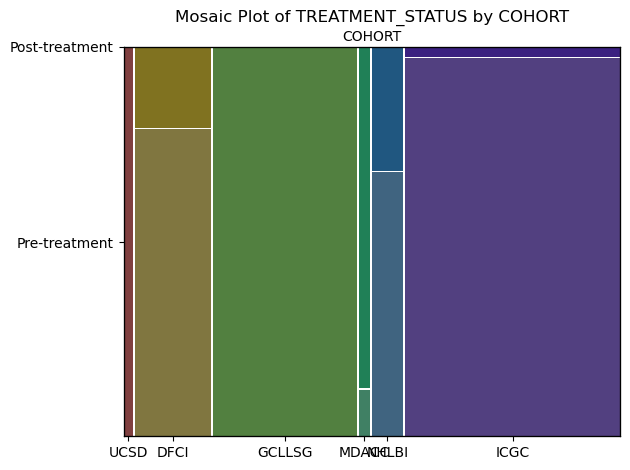

In [1331]:
from statsmodels.graphics.mosaicplot import mosaic
from scipy.stats import chi2_contingency

# Prepare contingency table for TREATMENT_STATUS vs COHORT
epitype_cohort_table = pd.crosstab(df['COHORT'], df['TREATMENT_STATUS'])

# Perform Chi-squared test
chi2, p, dof, expected = chi2_contingency(epitype_cohort_table)

print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)

if p < 0.05:
    print("Reject the null hypothesis: TREATMENT_STATUS distribution is not independent of COHORT.")
else:
    print("Fail to reject the null hypothesis: TREATMENT_STATUS distribution is independent of COHORT.")

# Mosaic plot with better scaling and simpler labels
plt.figure(figsize=(14, 6))
mosaic(df, ['COHORT', 'TREATMENT_STATUS'],
        labelizer=lambda k:"", # k[1],  # Only show TREATMENT_STATUS as label
       title='')
plt.title('Mosaic Plot of TREATMENT_STATUS by COHORT')
plt.xlabel('COHORT')
plt.ylabel('Proportion')
plt.tight_layout()
plt.show()

In [1332]:
# make stacked bar chart of TREATMENT_STATUS by COHORT using Plotly with percentages
cll_epitype_cohort = df.groupby(['COHORT', 'TREATMENT_STATUS']).size().unstack(fill_value=0)
cll_epitype_cohort_pct = cll_epitype_cohort.div(cll_epitype_cohort.sum(axis=1), axis=0) * 100
fig = go.Figure(data=[
    go.Bar(
        x=cll_epitype_cohort_pct.index,
        y=cll_epitype_cohort_pct[col],
        name=col
    ) for col in cll_epitype_cohort_pct.columns
])
fig.update_layout(
    barmode='stack',
    title='TREATMENT_STATUS Distribution by COHORT',
    xaxis_title='Cohort',
    yaxis_title='Percentage (%)'
)
fig.show()

#### TREATMENT_STATUS VS originType

In [1333]:
from scipy.stats import fisher_exact
from scipy.stats import chi2_contingency

# Fisher's Exact Test for TREATMENT_STATUS vs originType
# Prepare contingency table
cll_epitype_origin_table = pd.crosstab(df['originType'], df['TREATMENT_STATUS'])

# Fisher's Exact Test only works for 2x2 tables, so we use Chi-squared if more than 2 categories
if cll_epitype_origin_table.shape == (2, 2):
    _, p_value = fisher_exact(cll_epitype_origin_table)
    test_name = "Fisher's Exact Test"
else:
    _, p_value, _, _ = chi2_contingency(cll_epitype_origin_table)
    test_name = "Chi-squared Test"

print(f"{test_name} p-value:", p_value)
if p_value < 0.05:
    print("Reject the null hypothesis: TREATMENT_STATUS distribution is not independent of originType.")
else:
    print("Fail to reject the null hypothesis: TREATMENT_STATUS distribution is independent of originType.")

# Stacked bar plot with counts and percentage annotations
cll_epitype_origin_counts = cll_epitype_origin_table
cll_epitype_origin_pct = cll_epitype_origin_counts.div(cll_epitype_origin_counts.sum(axis=1), axis=0) * 100

fig = go.Figure()
for epitype in cll_epitype_origin_counts.columns:
    fig.add_bar(
        x=cll_epitype_origin_counts.index,
        y=cll_epitype_origin_counts[epitype],
        name=epitype
    )

# Add percentage annotations
for i, origin in enumerate(cll_epitype_origin_counts.index):
    y_offset = 0
    for epitype in cll_epitype_origin_counts.columns:
        count = cll_epitype_origin_counts.loc[origin, epitype]
        pct = cll_epitype_origin_pct.loc[origin, epitype]
        if count > 0:
            fig.add_annotation(
                x=origin,
                y=y_offset + count / 2,
                text=f"{pct:.1f}%",
                showarrow=False,
                font=dict(color="black", size=10),
                xanchor='center'
            )
        y_offset += count

fig.update_layout(
    barmode='stack',
    title='TREATMENT_STATUS Distribution by Origin Type',
    xaxis_title='Origin Type',
    yaxis_title='Count'
)
fig.show()

Fisher's Exact Test p-value: 0.025371453848809886
Reject the null hypothesis: TREATMENT_STATUS distribution is not independent of originType.


#### TREATMENT_STATUS VS year

In [1334]:
# CLL_EPITYPE vs year: Chi-squared test and temporal distribution

# Prepare contingency table
epitype_year_table = df.groupby(['year', 'TREATMENT_STATUS']).size().unstack(fill_value=0)

# Chi-squared test
chi2, p, dof, expected = stats.chi2_contingency(epitype_year_table)
print("Chi-squared statistic:", chi2)
print("p-value:", p)
print("Degrees of freedom:", dof)
if p < 0.05:
    print("Reject the null hypothesis: TREATMENT_STATUS distribution is not independent of year.")
else:
    print("Fail to reject the null hypothesis: TREATMENT_STATUS distribution is independent of year.")

# Calculate percentages for stacked area chart
epitype_year_pct = epitype_year_table.div(epitype_year_table.sum(axis=1), axis=0) * 100

# Stacked area chart (percentages) using Plotly
fig = go.Figure()
for epitype in epitype_year_pct.columns:
    fig.add_trace(go.Scatter(
        x=epitype_year_pct.index,
        y=epitype_year_pct[epitype],
        mode='lines',
        stackgroup='one',
        name=epitype
    ))
fig.update_layout(
    title='Temporal Distribution of TREATMENT_STATUS (Stacked Area %)',
    xaxis_title='Year',
    yaxis_title='Percentage (%)',
    legend_title='TREATMENT_STATUS'
)
fig.show()

Chi-squared statistic: 160.269357703425
p-value: 1.27984591640636e-33
Degrees of freedom: 4
Reject the null hypothesis: TREATMENT_STATUS distribution is not independent of year.


### Plotting

In [1335]:
# cohort_country_map = {
#     'ICGC': 'Spain',
#     'NHLBI': 'USA',
#     'DFCI': 'Massachusetts',
#     'UCSD': 'California',
#     'GCLLSG': 'Germany',
#     'MDACC': 'Texas'
# }

# df['Country'] = df['COHORT'].map(cohort_country_map)
# country_counts = df['Country'].value_counts().reset_index()
# country_counts.columns = ['Country', 'Count']

# fig = px.choropleth(country_counts, locations='Country', locationmode='state names',
#                     color='Count', title='Geographic Distribution of Cohorts',
#                     color_continuous_scale='Blues')
# fig.show()

In [1336]:
from plotly.graph_objects import Sankey

sources = []
targets = []
values = []

# Start from all to originType
grouped = df.groupby('originType').size().reset_index(name='count')
for i, row in grouped.iterrows():
    sources.append('All')
    targets.append(row['originType'])
    values.append(row['count'])


# Trial/Publication → Cohort
grouped1 = df.groupby(['originType', 'COHORT']).size().reset_index(name='count')
for i, row in grouped1.iterrows():
    sources.append(row['originType'])
    targets.append(row['COHORT'])
    values.append(row['count'])

# Cohort → originId
grouped2 = df.groupby(['COHORT', 'originId']).size().reset_index(name='count')
for i, row in grouped2.iterrows():
    sources.append(row['COHORT'])
    targets.append(f"originId_{row['originId']}")
    values.append(row['count'])

# Map labels to indices
labels = list(set(sources + targets))
label_indices = {label: i for i, label in enumerate(labels)}

# add count annotations to all the labels (based on their counts)
for i, label in enumerate(labels):
    if label.startswith('originId_'):
        origin_id = int(label.split('_')[1])
        if origin_id in originIdLabels:
            count = originIdLabels[origin_id]['count']
            labels[i] += f" ({count})"
    elif label in ['TRIAL', 'PUBLICATION']:
        count = df[df['originType'] == label].shape[0]
        labels[i] += f" ({count})"
    elif label in ['ICGC', 'NHLBI', 'DFCI', 'UCSD', 'GCLLSG', 'MDACC']:
        count = df[df['COHORT'] == label].shape[0]
        labels[i] += f" ({count})"
    elif label == 'All':
        labels[i] += f" ({sum(values)})"

fig = go.Figure(data=[go.Sankey(
    node=dict(label=labels),
    link=dict(
        source=[label_indices[s] for s in sources],
        target=[label_indices[t] for t in targets],
        value=values
    ))])

fig.update_layout(title_text="Dataset Source Flow", font_size=10)
fig.show()


In [1337]:
year_counts = df['year'].value_counts().sort_index().reset_index()
year_counts.columns = ['year', 'Patient_Count']

fig = px.bar(year_counts, x='year', y='Patient_Count',
             title="Number of Patients Added Over Time")
fig.show()

In [1338]:
df_sub = df.dropna(subset=['IGHV_MUTATION_STATUS'])
fig = px.histogram(df_sub, x='originId', color='IGHV_MUTATION_STATUS',
                   title='IGHV Mutation Status by Origin ID',
                   barmode='stack')
fig.show()

In [1339]:
df_sub = df.dropna(subset=['CLL_EPITYPE'])
fig = px.histogram(df_sub, x='originId', color='IGHV_MUTATION_STATUS',
                   title='IGHV Mutation Status by Origin ID',
                   barmode='stack')
fig.show()

In [1340]:
df_sub = df.dropna(subset=['CLL_EPITYPE'])
fig = px.histogram(df_sub, x='originId', color='CLL_EPITYPE',
                   title='CLL_EPITYPE by Origin ID',
                   barmode='stack')
fig.show()

In [1341]:
df[df['originId'] == 7]['CLL_EPITYPE'].isnull().sum()

np.int64(0)

/var/folders/_x/_k57kbwj3f11_drmx91npc7w0000gn/T/ipykernel_11264/254022526.py:1: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



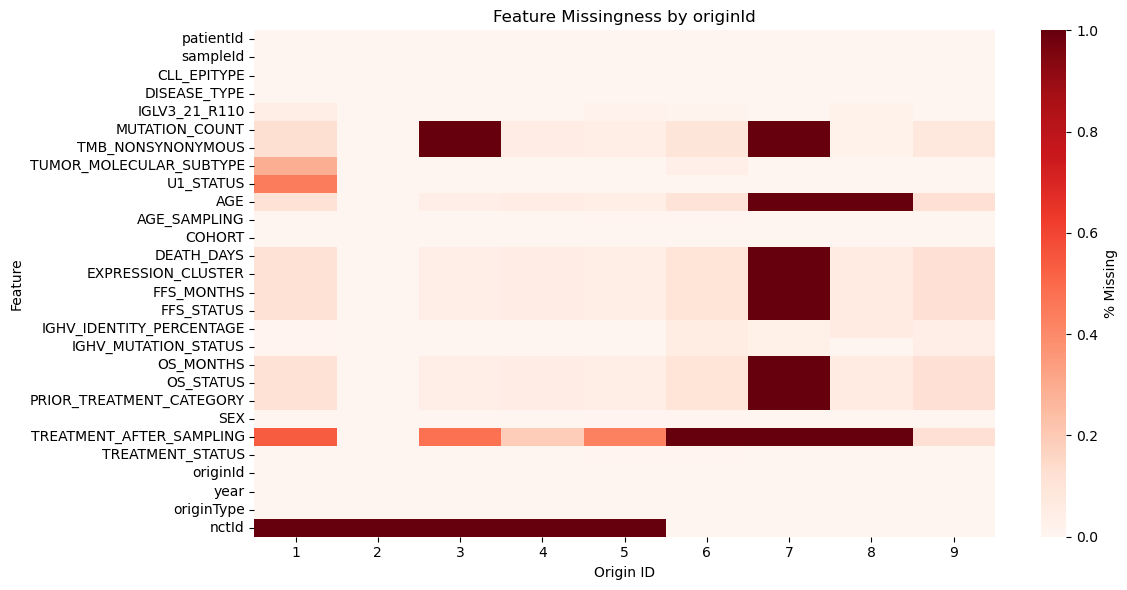

In [1342]:
missing = df.groupby('originId').apply(lambda x: x.isna().mean()).T
plt.figure(figsize=(12, 6))
sns.heatmap(missing, cmap='Reds', cbar_kws={'label': '% Missing'})
plt.title("Feature Missingness by originId")
plt.ylabel("Feature")
plt.xlabel("Origin ID")
plt.tight_layout()
plt.show()

In [1343]:
df_age = df.dropna(subset=['AGE', 'CLL_EPITYPE'])
fig = px.box(df_age, x='CLL_EPITYPE', y='AGE', color='CLL_EPITYPE',
             title='Age Distribution by CLL Epitype')
fig.show()

In [1344]:
df_age = df.dropna(subset=['AGE', 'IGHV_MUTATION_STATUS'])
fig = px.box(df_age, x='IGHV_MUTATION_STATUS', y='AGE', color='IGHV_MUTATION_STATUS',
             title='Age Distribution by CLL Epitype')
fig.show()

In [1345]:
groups = ['SEX', 'CLL_EPITYPE', 'TUMOR_MOLECULAR_SUBTYPE']
risk_matrix = pd.DataFrame(index=groups, columns=['Sample Count', 'Missing % (OS_STATUS)'])

for g in groups:
    subset = df.groupby(g)
    counts = subset.size()
    missing = subset['OS_STATUS'].apply(lambda x: x.isna().mean())
    risk_matrix.loc[g] = [counts.min(), round(missing.max() * 100, 1)]

display(risk_matrix)

,Sample Count,Missing % (OS_STATUS)
SEX,408,13.5
CLL_EPITYPE,141,50.2
TUMOR_MOLECULAR_SUBTYPE,468,13.7


In [1346]:
from sklearn.preprocessing import StandardScaler
from sklearn.manifold import TSNE
import umap

features = ['MUTATION_COUNT', 'TMB_NONSYNONYMOUS', 'AGE']
df_umap = df.dropna(subset=features + ['IGHV_MUTATION_STATUS'])
X = StandardScaler().fit_transform(df_umap[features])

embedding = umap.UMAP(n_neighbors=15, min_dist=0.1).fit_transform(X)
df_umap['UMAP_1'], df_umap['UMAP_2'] = embedding[:, 0], embedding[:, 1]

fig = px.scatter(df_umap, x='UMAP_1', y='UMAP_2', color='IGHV_MUTATION_STATUS',
                 title='UMAP Projection by IGHV Mutation Status')
fig.show()

ModuleNotFoundError: No module named 'sklearn'

In [ ]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

kmf = KaplanMeierFitter()
plt.figure(figsize=(8,6))

for epitype in df['CLL_EPITYPE'].dropna().unique():
    sub = df[df['CLL_EPITYPE'] == epitype]
    if sub['OS_MONTHS'].notna().sum() > 20:
        kmf.fit(sub['OS_MONTHS'], sub['OS_STATUS'], label=epitype)
        kmf.plot_survival_function()

plt.title('Survival by CLL Epitype')
plt.xlabel("Months")
plt.ylabel("Survival Probability")
plt.grid(True)
plt.show()

ModuleNotFoundError: No module named 'lifelines'

### Extra

In [ ]:
df[df['CLL_EPITYPE'] == 'unclassified']['originId'].value_counts()

originId
5    55
3    24
1    24
2    20
6     4
8     4
4     2
9     2
Name: count, dtype: int64

In [ ]:
# FIND rows where TUMOR_MOLECULAR_SUBTYPE is M-CLL and IGHV_MUTATION_STATUS iS NOT mutated
df[(df['TUMOR_MOLECULAR_SUBTYPE'] == 'M-CLL') & (df['IGHV_MUTATION_STATUS'] == 'unmutated')][['patientId', 'sampleId', 'TUMOR_MOLECULAR_SUBTYPE', 'IGHV_MUTATION_STATUS']]

,patientId,sampleId,TUMOR_MOLECULAR_SUBTYPE,IGHV_MUTATION_STATUS
23,P-CRC-0020,DFCI-5053,M-CLL,unmutated
32,P-DFCI-5002,DFCI-5002,M-CLL,unmutated
38,P-DFCI-5018,DFCI-5018,M-CLL,unmutated
45,P-DFCI-5035,DFCI-5035,M-CLL,unmutated
51,P-DFCI-5045,DFCI-5045,M-CLL,unmutated
...,...,...,...,...
981,P-SCLL-0334,SCLL-0334,M-CLL,unmutated
988,P-SCLL-0341,SCLL-0341,M-CLL,unmutated
997,P-SCLL-0350,SCLL-0350,M-CLL,unmutated
1000,P-SCLL-0353,SCLL-0353,M-CLL,unmutated


In [ ]:
# FIND rows where TUMOR_MOLECULAR_SUBTYPE is M-CLL and IGHV_MUTATION_STATUS iS NOT mutated
df[(df['TUMOR_MOLECULAR_SUBTYPE'] == 'U-CLL') & (df['IGHV_MUTATION_STATUS'] == 'mutated')][['patientId', 'sampleId', 'TUMOR_MOLECULAR_SUBTYPE', 'IGHV_MUTATION_STATUS']]

,patientId,sampleId,TUMOR_MOLECULAR_SUBTYPE,IGHV_MUTATION_STATUS
7,P-CRC-0007,DFCI-5193,U-CLL,mutated
10,P-CRC-0009,JB-0010,U-CLL,mutated
26,P-CRC-0028,CRC-0028,U-CLL,mutated
42,P-DFCI-5027,DFCI-5027,U-CLL,mutated
44,P-DFCI-5034,DFCI-5034,U-CLL,mutated
...,...,...,...,...
983,P-SCLL-0336,SCLL-0336,U-CLL,mutated
991,P-SCLL-0344,SCLL-0344,U-CLL,mutated
992,P-SCLL-0345,SCLL-0345,U-CLL,mutated
1001,P-SCLL-0354,SCLL-0354,U-CLL,mutated


In [ ]:
#  there are 2 rows in df[df['patientId'] == 'P-CRC-0007'], find where they differ
def check_patient_differences(patientId):
    dupl = df[df['patientId'] == patientId]
    diff_columns = dupl.columns[dupl.nunique() > 1]
    # append ['IGHV_MUTATION_STATUS', 'TUMOR_MOLECULAR_SUBTYPE'] to diff_columns
    diff_columns = diff_columns.append(pd.Index(['IGHV_MUTATION_STATUS', 'TUMOR_MOLECULAR_SUBTYPE']))
    display(dupl[diff_columns])
    return df[df['patientId'] == patientId]

# print rows with duplicate patient IDs
duplicates = ['P-CRC-0007',
'P-CRC-0009',
'P-CRC-0011',
'P-CRC-0020',
'P-NHLBI-0073']
for patientId in duplicates:
    print(f"Checking differences for patientId: {patientId}")
    check_patient_differences(patientId)

Checking differences for patientId: P-CRC-0007


,sampleId,EC_DISCOVERY,M-CLL_WES,RRBS,TUMOR_MOLECULAR_SUBTYPE,IGHV_MUTATION_STATUS,TUMOR_MOLECULAR_SUBTYPE
6,CRC-0007,No,Yes,Yes,M-CLL,mutated,M-CLL
7,DFCI-5193,Yes,No,No,U-CLL,mutated,U-CLL


Checking differences for patientId: P-CRC-0009


,sampleId,EC_DISCOVERY,M-CLL_WES,RRBS,SEQUENCING_PLATFORM,TUMOR_MOLECULAR_SUBTYPE,IGHV_MUTATION_STATUS,TUMOR_MOLECULAR_SUBTYPE
9,CRC-0009,Yes,Yes,Yes,WES,M-CLL,mutated,M-CLL
10,JB-0010,No,No,No,WGS,U-CLL,mutated,U-CLL


Checking differences for patientId: P-CRC-0011


,sampleId,EC_DISCOVERY,RRBS,U-CLL_WES,IGHV_MUTATION_STATUS,TUMOR_MOLECULAR_SUBTYPE
12,CRC-0011,No,Yes,Yes,unmutated,U-CLL
13,DFCI-5170,Yes,No,No,unmutated,U-CLL


Checking differences for patientId: P-CRC-0020


,sampleId,EC_DISCOVERY,RRBS,TUMOR_MOLECULAR_SUBTYPE,U-CLL_WES,U1_STATUS,IGHV_MUTATION_STATUS,TUMOR_MOLECULAR_SUBTYPE
22,CRC-0020,Yes,Yes,U-CLL,Yes,WT,unmutated,U-CLL
23,DFCI-5053,No,No,M-CLL,No,MUT,unmutated,M-CLL


Checking differences for patientId: P-NHLBI-0073


,sampleId,EC_EXTENSION,M-CLL_WES,RNA_SEQUENCING,TUMOR_MOLECULAR_SUBTYPE,IGHV_MUTATION_STATUS,TUMOR_MOLECULAR_SUBTYPE
633,NHLBI-0052,Yes,No,Yes,U-CLL,mutated,U-CLL
634,NHLBI-0073,No,Yes,No,M-CLL,mutated,M-CLL


In [ ]:
df[df['originId'] == 4][['patientId', 'sampleId', 'COHORT', 'AGE', 'AGE_SAMPLING', 'SEX','TREATMENT_STATUS', 'TREATMENT_AFTER_SAMPLING', 'PRIOR_TREATMENT_CATEGORY',]]

,patientId,sampleId,COHORT,AGE,AGE_SAMPLING,SEX,TREATMENT_STATUS,TREATMENT_AFTER_SAMPLING,PRIOR_TREATMENT_CATEGORY
0,P-CRC-0001,CRC-0001,UCSD,44.0,46.0,Female,Pre-treatment,Chemo + Ab,Untreated
1,P-CRC-0002,CRC-0002,UCSD,55.0,56.0,Male,Pre-treatment,Chemo + Ab,Untreated
2,P-CRC-0003,CRC-0003,UCSD,63.0,63.0,Female,Pre-treatment,Chemo + Ab,Untreated
3,P-CRC-0004,CRC-0004,UCSD,51.0,51.0,Male,Pre-treatment,Chemo + Ab,Untreated
4,P-CRC-0005,CRC-0005,UCSD,36.0,37.0,Male,Pre-treatment,Chemo + Ab,Untreated
5,P-CRC-0006,CRC-0006,UCSD,58.0,66.0,Male,Pre-treatment,Chemo + Ab,Untreated
6,P-CRC-0007,CRC-0007,UCSD,57.0,57.0,Female,Pre-treatment,Chemo + Ab,Untreated
7,P-CRC-0007,DFCI-5193,UCSD,57.0,57.0,Female,Pre-treatment,Chemo + Ab,Untreated
8,P-CRC-0008,CRC-0008,UCSD,44.0,47.0,Male,Pre-treatment,Chemo + Ab,Untreated
9,P-CRC-0009,CRC-0009,UCSD,54.0,54.0,Male,Pre-treatment,LEN + chemo + Ab,Untreated


In [ ]:
# PRINT ROWS with id in between P-CRC-0025 an dP-CRC-0035 inclusive
display(df[(df['patientId'] >= 'P-CRC-0025') & (df['patientId'] <= 'P-CRC-0035')][['patientId', 'sampleId', 'COHORT', 'AGE','AGE_SAMPLING', 'TREATMENT_STATUS', 'PRIOR_TREATMENT_CATEGORY', 'TREATMENT_AFTER_SAMPLING']])

,patientId,sampleId,COHORT,AGE,AGE_SAMPLING,TREATMENT_STATUS,PRIOR_TREATMENT_CATEGORY,TREATMENT_AFTER_SAMPLING
25,P-CRC-0025,CRC-0025,UCSD,NaN,69.0,Pre-treatment,NaN,NaN
26,P-CRC-0028,CRC-0028,UCSD,NaN,69.0,Post-treatment,NaN,NaN
27,P-CRC-0029,CRC-0029,UCSD,NaN,58.0,Pre-treatment,NaN,NaN
28,P-CRC-0033,CRC-0033,UCSD,NaN,45.0,Post-treatment,NaN,NaN
29,P-CRC-0035,CRC-0035,UCSD,NaN,NaN,NaN,NaN,NaN
30,P-CRC-0035,DFCI-5088,UCSD,NaN,NaN,NaN,NaN,NaN


In [ ]:
df[df['sampleId'] == 'DFCI-5088']

,patientId,sampleId,CLL_EPITYPE,DISEASE_TYPE,IGLV3_21_R110,MUTATION_COUNT,TMB_NONSYNONYMOUS,TUMOR_MOLECULAR_SUBTYPE,U1_STATUS,AGE,...,OS_STATUS,PRIOR_TREATMENT_CATEGORY,SAMPLE_COUNT,SEX,TREATMENT_AFTER_SAMPLING,TREATMENT_STATUS,originId,year,originType,nctId
30,P-CRC-0035,DFCI-5088,unclassified,CLL,No,27.0,0.866667,M-CLL,WT,NaN,...,NaN,NaN,2,NaN,NaN,NaN,4,2022,PUBLICATION,None


In [ ]:
#  PRINT ROWS with id in between P-CRC-0025 an dP-CRC-0035 inclusive - SHOW HOW MANY NAN values for each column
nan_counts = df[(df['patientId'] >= 'P-CRC-0025') & (df['patientId'] <= 'P-CRC-0035')].isna().sum()
nan_counts = nan_counts[nan_counts > 0]
nan_counts = nan_counts.reset_index()
nan_counts.columns = ['Column', 'NaN_Count']
print("Columns with NaN values in the specified range:")
print(nan_counts)   

Columns with NaN values in the specified range:
                      Column  NaN_Count
0             MUTATION_COUNT          5
1          TMB_NONSYNONYMOUS          5
2                        AGE          6
3               AGE_SAMPLING          2
4                 DEATH_DAYS          6
5         EXPRESSION_CLUSTER          6
6                 FFS_MONTHS          6
7                 FFS_STATUS          6
8   IGHV_IDENTITY_PERCENTAGE          2
9       IGHV_MUTATION_STATUS          2
10                 OS_MONTHS          6
11                 OS_STATUS          6
12  PRIOR_TREATMENT_CATEGORY          6
13                       SEX          2
14  TREATMENT_AFTER_SAMPLING          6
15          TREATMENT_STATUS          2
16                     nctId          6


In [ ]:
df[df['originId'] == 3]

,patientId,sampleId,CLL_EPITYPE,DISEASE_TYPE,IGLV3_21_R110,MUTATION_COUNT,TMB_NONSYNONYMOUS,TUMOR_MOLECULAR_SUBTYPE,U1_STATUS,AGE,...,OS_STATUS,PRIOR_TREATMENT_CATEGORY,SAMPLE_COUNT,SEX,TREATMENT_AFTER_SAMPLING,TREATMENT_STATUS,originId,year,originType,nctId
525,P-JB-0003,JB-0003,unclassified,CLL,No,NaN,NaN,U-CLL,WT,41.0,...,0:LIVING,Untreated,1,Female,Chemo + Ab,Pre-treatment,3,2015,PUBLICATION,None
526,P-JB-0004,JB-0004,unclassified,CLL,No,NaN,NaN,U-CLL,WT,61.0,...,0:LIVING,Untreated,1,Female,NaN,Pre-treatment,3,2015,PUBLICATION,None
527,P-JB-0005,JB-0005,unclassified,CLL,No,NaN,NaN,U-CLL,WT,45.0,...,1:DECEASED,Untreated,1,Female,PI3K + chemo + Ab,Pre-treatment,3,2015,PUBLICATION,None
528,P-JB-0006,JB-0006,unclassified,CLL,Yes,NaN,NaN,U-CLL,WT,82.0,...,0:LIVING,Untreated,1,Female,LEN + chemo + Ab,Pre-treatment,3,2015,PUBLICATION,None
529,P-JB-0007,JB-0007,unclassified,CLL,No,NaN,NaN,U-CLL,WT,34.0,...,0:LIVING,Untreated,1,Male,NaN,Pre-treatment,3,2015,PUBLICATION,None
530,P-JB-0008,JB-0008,unclassified,CLL,No,NaN,NaN,M-CLL,WT,82.0,...,1:DECEASED,Untreated,1,Male,NaN,Pre-treatment,3,2015,PUBLICATION,None
531,P-JB-0009,JB-0009,unclassified,CLL,No,NaN,NaN,U-CLL,WT,40.0,...,0:LIVING,Untreated,1,Male,NaN,Pre-treatment,3,2015,PUBLICATION,None
532,P-JB-0011,JB-0011,unclassified,CLL,No,NaN,NaN,M-CLL,WT,41.0,...,0:LIVING,Untreated,1,Male,Ab + no chemo,Pre-treatment,3,2015,PUBLICATION,None
533,P-JB-0012,JB-0012,unclassified,CLL,No,NaN,NaN,U-CLL,WT,67.0,...,0:LIVING,Untreated,1,Male,Chemo + Ab,Pre-treatment,3,2015,PUBLICATION,None
534,P-JB-0013,JB-0013,unclassified,CLL,No,NaN,NaN,U-CLL,WT,32.0,...,0:LIVING,Untreated,1,Female,BTK + chemo + Ab,Pre-treatment,3,2015,PUBLICATION,None


In [ ]:
# find min AGE and max AGE, same for AGE_SAMPLING
print("Min AGE:", df['AGE'].min())
print("Max AGE:", df['AGE'].max())
print("Min AGE_SAMPLING:", df['AGE_SAMPLING'].min())
print("Max AGE_SAMPLING:", df['AGE_SAMPLING'].max())

Min AGE: 18.0
Max AGE: 93.0
Min AGE_SAMPLING: 19.0
Max AGE_SAMPLING: 94.0


In [ ]:
fig = px.histogram(df, x='TUMOR_MOLECULAR_SUBTYPE', color='originType',
                   barmode='stack',
                   title='Distribution of IGHV Subtypes by Origin Type')
fig.show()

In [ ]:
fig = px.histogram(df, x='COHORT', color='CLL_EPITYPE',
                   title='CLL Epitype Distribution by Cohort', barmode='stack')
fig.update_layout(xaxis_tickangle=-45)
fig.show()


In [ ]:
fig = px.histogram(df, x='originType', color='CLL_EPITYPE',
                   title='CLL Epitype Distribution by Cohort', barmode='stack')
fig.update_layout(xaxis_tickangle=-45)
fig.show()

In [ ]:
fig = px.histogram(df, x='IGHV_MUTATION_STATUS', color='originType',
                   barmode='stack',
                   title='Distribution of IGHV Subtypes by Origin Type')
fig.show()

In [ ]:
fig = px.histogram(df, x='CLL_EPITYPE', color='originType',
                   barmode='stack',
                   title='Distribution of IGHV Subtypes by Origin Type')
fig.show()

In [ ]:
fig = px.box(df, x='originType', y='AGE', color='originType',
             title='Age Distribution by Origin Type')
fig.show()

In [ ]:
fig = px.histogram(df, x='SEX', color='originType',
                   barmode='group',
                   title='Sex Distribution by Origin Type')
fig.show()


In [ ]:
# do percentage of TREATMENT_STATUS by originType
# df['TREATMENT_STATUS'] = df['TREATMENT_STATUS'].fillna('Unknown')
# df['TREATMENT_STATUS'] = df['TREATMENT_STATUS'].astype(str) 
treatment_counts = df.groupby(['originType', 'TREATMENT_STATUS']).size().reset_index(name='count')
treatment_counts['percentage'] = treatment_counts.groupby('originType')['count'].transform(lambda x: x / x.sum() * 100) 
fig = px.bar(treatment_counts, x='originType', y='percentage', color='TREATMENT_STATUS',
             title='Treatment Status Percentage by Origin Type',
             labels={'percentage': 'Percentage (%)', 'originType': 'Origin Type'},
             text='percentage')
fig.update_layout(barmode='stack', xaxis_title='Origin Type', yaxis_title='Percentage (%)')
fig.show()

In [ ]:
# TREATMENT STATUS percentage by cohort
treatment_counts = df.groupby(['COHORT', 'TREATMENT_STATUS']).size().reset_index(name='count')
treatment_counts['percentage'] = treatment_counts.groupby('COHORT')['count'].transform(lambda x: x / x.sum() * 100)
fig = px.bar(treatment_counts, x='COHORT', y='percentage', color='TREATMENT_STATUS',
                title='Treatment Status Percentage by Cohort',
                labels={'percentage': 'Percentage (%)', 'COHORT': 'Cohort'},
                text='percentage')
fig.update_layout(barmode='stack', xaxis_title='Cohort', yaxis_title='Percentage (%)')
fig.show()

In [ ]:
# TREATMENT STATUS percentage by cohort
treatment_counts = df.groupby(['originId', 'TREATMENT_STATUS']).size().reset_index(name='count')
treatment_counts['percentage'] = treatment_counts.groupby('originId')['count'].transform(lambda x: x / x.sum() * 100)
fig = px.bar(treatment_counts, x='originId', y='percentage', color='TREATMENT_STATUS',
                title='Treatment Status Percentage by originId',
                labels={'percentage': 'Percentage (%)', 'originId': 'Cohort'},
                text='percentage')
fig.update_layout(barmode='stack', xaxis_title='Cohort', yaxis_title='Percentage (%)')
fig.show()

In [ ]:
# TREATMENT STATUS percentage by cohort
treatment_counts = df.groupby(['originId', 'PRIOR_TREATMENT_CATEGORY']).size().reset_index(name='count')
treatment_counts['percentage'] = treatment_counts.groupby('originId')['count'].transform(lambda x: x / x.sum() * 100)
fig = px.bar(treatment_counts, x='originId', y='percentage', color='PRIOR_TREATMENT_CATEGORY',
                title='Treatment Status Percentage by originId',
                labels={'percentage': 'Percentage (%)', 'originId': 'Cohort'},
                text='percentage')
fig.update_layout(barmode='stack', xaxis_title='Cohort', yaxis_title='Percentage (%)')
fig.show()

In [ ]:
# TREATMENT STATUS percentage by cohort
treatment_counts = df.groupby(['originId', 'TREATMENT_AFTER_SAMPLING']).size().reset_index(name='count')
treatment_counts['percentage'] = treatment_counts.groupby('originId')['count'].transform(lambda x: x / x.sum() * 100)
fig = px.bar(treatment_counts, x='originId', y='percentage', color='TREATMENT_AFTER_SAMPLING',
                title='Treatment Status Percentage by originId',
                labels={'percentage': 'Percentage (%)', 'originId': 'Cohort'},
                text='percentage')
fig.update_layout(barmode='stack', xaxis_title='Cohort', yaxis_title='Percentage (%)')
fig.show()